# Data Science Project 1: Free Throws

Questions from the project template:

What is the impact of home vs away on free throws?

* What is the impact of playoffs on free throws?
* What is the impact of how far into the game we are (in minutes) on free throws?
* Which players seem to be especially consistent in all situations? Meaning they always make/miss at about the same rate, regardless of any factors.
How important are free throws in terms of winning/losing the game?

My questions:

* Which shots were made during the playoffs (31704) and which were made during non-playoff games?
* What percentage of playoff free throws were made?
* What percentage of non-playoff free throws were made?
* Do these percentages differ between first, second, third shots?

* What is the average rate of shot success for any particular player for the first, second, third shots?
* What is the average difference between the most successful shot category for a player and the least successful? Which players have the smallest difference?

* For a given team, what is the rate of won games?
* For a given team, what is the rate of free throws made in games that they won?
* For a given team, what is the rate of free throws made in games that they lost?

In [1]:
# Questions
#how many free throws team made when they won

# 618019 shots made
# shots total = 467689
# shots during play offs = 31704
# total playoff = 42126

#home team won 370639 times

# HV_Question: group by different players and see percentage of shots made

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/Shareddrives/MATH 2327 3439 - Data/data/free_throws.csv")

## Initial characterization of data

This dataframe contains 618019 rows and 13 columns.

In [4]:
df

,period,player,playoffs,shot_made,home_team,visit_team,home_score,visit_score,home_final_score,visit_final_score,minutes,season_start,shot_count
0,1,Andrew Bynum,0,1,LAL,PHX,1,0,114,106,47.000000,2006,1
1,1,Andrew Bynum,0,1,LAL,PHX,2,0,114,106,47.000000,2006,2
2,1,Andrew Bynum,0,1,LAL,PHX,12,18,114,106,29.733333,2006,1
3,1,Andrew Bynum,0,0,LAL,PHX,12,18,114,106,29.733333,2006,2
4,1,Shawn Marion,0,1,LAL,PHX,12,21,114,106,29.200000,2006,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618014,4,Randy Foye,1,1,OKC,DAL,116,103,118,104,3.533333,2015,1
618015,4,Randy Foye,1,1,OKC,DAL,117,103,118,104,3.533333,2015,2
618016,4,Kevin Durant,1,1,OKC,DAL,118,103,118,104,1.800000,2015,1
618017,4,Dwight Powell,1,0,OKC,DAL,118,103,118,104,1.733333,2015,1


In [6]:


shots_made_df = df.groupby('player')['shot_made'].sum()
#Groupby both period and player to see the consistency
# df.groupby(['player','period'])
# for i in df['player'].unique():
#   print(df[df['player']==i]['player'].value_counts())
shots_made_taken_df = df.groupby("player").agg({"shot_made" : ["sum", "count"]})
shots_made_taken_df

shot_pct = shots_made_taken_df['shot_made']['sum']/shots_made_taken_df['shot_made']['count']*100

shot_pct


player
A.J. Price            74.822695
Aaron Brooks          83.678990
Aaron Gordon          68.110236
Aaron Gray            55.752212
Aaron Harrison        41.666667
                        ...    
Zach LaVine           81.578947
Zach Randolph         76.515373
Zaza Pachulia         75.220805
Zoran Dragic          60.000000
Zydrunas Ilgauskas    78.935698
Length: 1098, dtype: float64

In [7]:
#Groupby both period and player to see the consistency
df_grouped2 = df.groupby(['player','period'])
df_grouped2_agg = df_grouped2.agg({"shot_made" : ["sum", "count"]})

grouped2_pct = df_grouped2_agg['shot_made']['sum']/df_grouped2_agg['shot_made']['count']*100

grouped2_pct



player              period
A.J. Price          1          72.500000
                    2          70.312500
                    3          77.358491
                    4          76.612903
                    5         100.000000
                                 ...    
Zydrunas Ilgauskas  1          78.354978
                    2          78.136201
                    3          81.000000
                    4          78.723404
                    5          75.000000
Length: 4774, dtype: float64

In [8]:
grouped2_pct

player              period
A.J. Price          1          72.500000
                    2          70.312500
                    3          77.358491
                    4          76.612903
                    5         100.000000
                                 ...    
Zydrunas Ilgauskas  1          78.354978
                    2          78.136201
                    3          81.000000
                    4          78.723404
                    5          75.000000
Length: 4774, dtype: float64

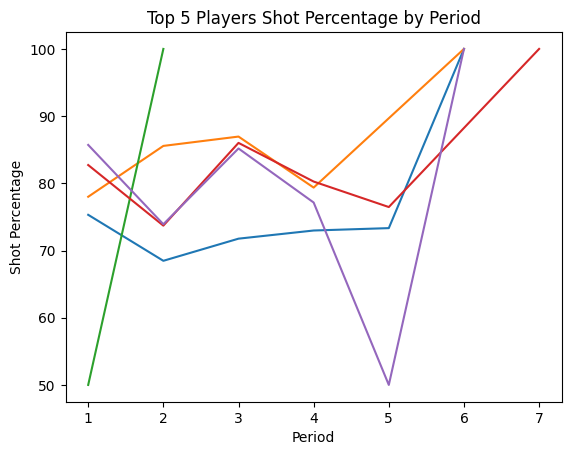

In [9]:
import matplotlib.pyplot as plt

# First, let's sort the players by their shot percentage
sorted_pct = grouped2_pct.sort_values(ascending=False)

# Then, let's get the top 10 players
top_players = sorted_pct.head(5).index.get_level_values('player').unique()

# Now, let's filter the original DataFrame to only include these top players
df_top_players = df[df['player'].isin(top_players)]

# Group and calculate the shot percentage again
df_grouped_top = df_top_players.groupby(['player','period']).agg({"shot_made" : ["sum", "count"]})
grouped_top_pct = df_grouped_top['shot_made']['sum']/df_grouped_top['shot_made']['count']*100

# Now we can create the line graph
for player in top_players:
    player_data = grouped_top_pct.loc[player]
    plt.plot(player_data.index, player_data.values, label=player)

plt.xlabel('Period')
plt.ylabel('Shot Percentage')
plt.title('Top 5 Players Shot Percentage by Period')
#plt.legend()
plt.show()


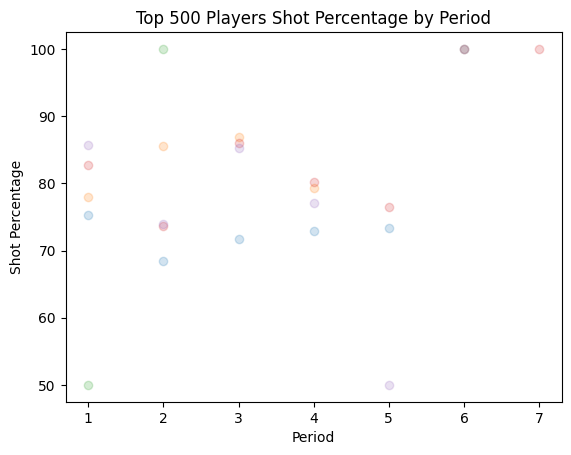

In [10]:
import matplotlib.pyplot as plt
#Same thing in scatter plot. Line looks better since it's not continuous
# The top players and their shot percentages remain the same

# Now we can create the scatter plot
for player in top_players:
    player_data = grouped_top_pct.loc[player]
    plt.scatter(player_data.index, player_data.values, label=player,alpha=0.2)

plt.xlabel('Period')
plt.ylabel('Shot Percentage')
plt.title('Top 500 Players Shot Percentage by Period')
#plt.legend()
plt.show()


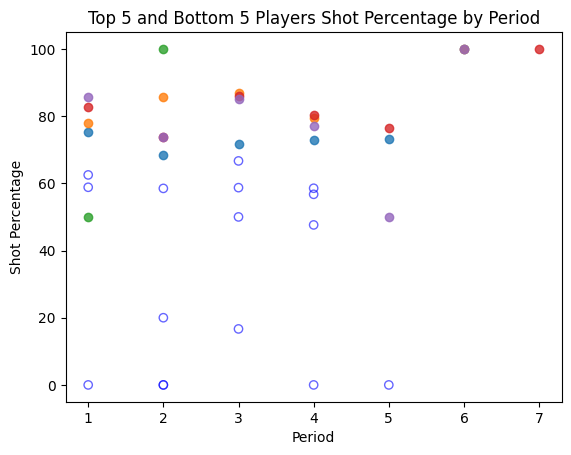

In [11]:
#Now same for bottom 5
import matplotlib.pyplot as plt

# Let's get the bottom 5 players
bottom_players = sorted_pct.tail(5).index.get_level_values('player').unique()

# Now, let's filter the original DataFrame to only include these bottom players
df_bottom_players = df[df['player'].isin(bottom_players)]

# Group and calculate the shot percentage again
df_grouped_bottom = df_bottom_players.groupby(['player','period']).agg({"shot_made" : ["sum", "count"]})
grouped_bottom_pct = df_grouped_bottom['shot_made']['sum']/df_grouped_bottom['shot_made']['count']*100

# Now we can create the line graph for top players
# for player in top_players:
#     player_data = grouped_top_pct.loc[player]
#     plt.plot(player_data.index, player_data.values, label=player)

for player in top_players:
    player_data = grouped_top_pct.loc[player]
    plt.scatter(player_data.index, player_data.values, label=player,alpha=0.8)

# And the line graph for bottom players
# for player in bottom_players:
#     player_data = grouped_bottom_pct.loc[player]
#     plt.plot(player_data.index, player_data.values, label=player, linestyle='dashed')

for player in bottom_players:
    player_data = grouped_bottom_pct.loc[player]
    plt.scatter(player_data.index, player_data.values, label=player,alpha=0.6, facecolors='none',edgecolors='blue')

plt.xlabel('Period')
plt.ylabel('Shot Percentage')
plt.title('Top 5 and Bottom 5 Players Shot Percentage by Period')
#plt.legend()
plt.show()
